In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Import custom functions and classes
from funcs import classify_sentiment, CustomFeatureExtractor, train_and_evaluate_pipeline, train_evaluate_and_save_pipeline

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("sample.csv")
scaler=MinMaxScaler(feature_range=(-1,1))
df['normalized_rating']=scaler.fit_transform(df[['rating']])
df['score']=df.apply(lambda row : (row['normalized_rating']+row['polarity']*0.5),axis=1)
df['sentiment']=df['score'].apply(lambda x : classify_sentiment(x))



# Check for null values in the 'review' column
if df['review'].isnull().any():
    print("Null values found in 'review' column! Replacing with empty strings.")
    df['review'] = df['review'].fillna('')

Null values found in 'review' column! Replacing with empty strings.


In [3]:
X = df[[ 'subjectivity', 'score']]
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}
# Store accuracies in a dictionary
results = {}

feature_extractor = CustomFeatureExtractor()
for name, classifier in classifiers.items():
    accuracy = train_and_evaluate_pipeline(X_train, y_train, X_test, y_test, feature_extractor, classifier)

    results[name+"_cf"] = accuracy

classifiers['Naive Bayes']=MultinomialNB()
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_extractor = CountVectorizer()
for name, classifier in classifiers.items():
    accuracy = train_and_evaluate_pipeline(X_train, y_train, X_test, y_test, feature_extractor, classifier)
    results[name+"_bow"] = accuracy

feature_extractor = TfidfVectorizer()
for name, classifier in classifiers.items():
    accuracy = train_and_evaluate_pipeline(X_train, y_train, X_test, y_test, feature_extractor, classifier)
    results[name+"_tfidf"] = accuracy


{'LogisticRegression_cf': 0.9765,
 'SVM_cf': 0.99,
 'Naive Bayes_cf': 0.982,
 'LogisticRegression_bow': 0.7885,
 'SVM_bow': 0.7865,
 'Naive Bayes_bow': 0.7905,
 'LogisticRegression_tfidf': 0.8005,
 'SVM_tfidf': 0.7945,
 'Naive Bayes_tfidf': 0.7305}

,Custom Feature,Bag of Words,TF-IDF
LogisticRegression,0.9765,0.7885,0.8005
SVM,0.9900,0.7865,0.7945
Naive Bayes,0.9820,0.7905,0.7305


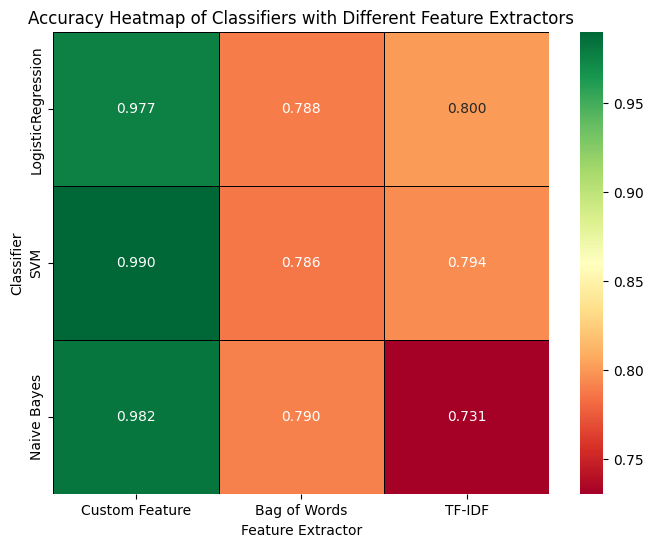

In [4]:

# Reshape the data into a DataFrame
data = {
    'Custom Feature': [results['LogisticRegression_cf'], results['SVM_cf'], results['Naive Bayes_cf']],
    'Bag of Words': [results['LogisticRegression_bow'], results['SVM_bow'], results['Naive Bayes_bow']],
    'TF-IDF': [results['LogisticRegression_tfidf'], results['SVM_tfidf'], results['Naive Bayes_tfidf']]
}
index = ['LogisticRegression', 'SVM', 'Naive Bayes']

results_df = pd.DataFrame(data, index=index)
display(results)
display(results_df)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(results_df, annot=True, cmap='RdYlGn', cbar=True,fmt=".3f",linewidths=0.5,linecolor="black")
plt.title('Accuracy Heatmap of Classifiers with Different Feature Extractors')
plt.xlabel('Feature Extractor')
plt.ylabel('Classifier')
plt.show()


In [9]:
import joblib

from sklearn.metrics import accuracy_score 
from sklearn.pipeline import  Pipeline
X = df[[  'subjectivity', 'score']]
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_extractor = CustomFeatureExtractor()
classifier = LogisticRegression()
f_name='Linear_Regression_Custom_Features'

train_evaluate_and_save_pipeline(X_train, y_train, X_test, y_test, feature_extractor,classifier, f_name)

Pipeline saved as Linear_Regression_Custom_Features.pkl


0.9765